In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly

In [3]:
col_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# pdf = pd.read_csv(r'../input/housing-data/housing.csv',  delimiter=r"\s+", names=col_names,
pdf = pd.read_csv(r'C:\Users\mdali\Desktop\data_science\1 dataset\odin_school\EDA\housing.csv',  delimiter=r"\s+", names=col_names,)

In [4]:
print('Number of Observation dataset has : ', pdf.shape[0])
print('Number of Variable dataset has    : ', pdf.shape[1])

Number of Observation dataset has :  506
Number of Variable dataset has    :  14


In [5]:
pdf.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [6]:
pdf.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
pdf.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0,0.573,6.030,80.8,2.5050,1,273.0,21.0,396.90,7.88,11.9


In [8]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [9]:
pdf[['CHAS', 'RAD']] = pdf[['CHAS', 'RAD']].astype('object')

In [10]:
pdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    object 
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    object 
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), object(2)
memory usage: 55.5+ KB


In [11]:
num_col = list(pdf.select_dtypes('number').columns)
print('Numerical Varialbes  ', num_col)
print()
cat_col = list(pdf.select_dtypes('object').columns)
print('Categorical Variables', cat_col)

Numerical Varialbes   ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

Categorical Variables ['CHAS', 'RAD']


In [12]:
pdf[num_col].describe().round(2)

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.55,6.28,68.57,3.80,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.12,0.70,28.15,2.11,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.38,3.56,2.90,1.13,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.45,5.89,45.02,2.10,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.54,6.21,77.50,3.21,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.62,6.62,94.07,5.19,666.00,20.20,396.22,16.96,25.00
max,88.98,100.00,27.74,0.87,8.78,100.00,12.13,711.00,22.00,396.90,37.97,50.00


In [13]:
pdf[cat_col].describe()

,CHAS,RAD
count,506,506
unique,2,9
top,0,24
freq,471,132


In [14]:
pdf.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

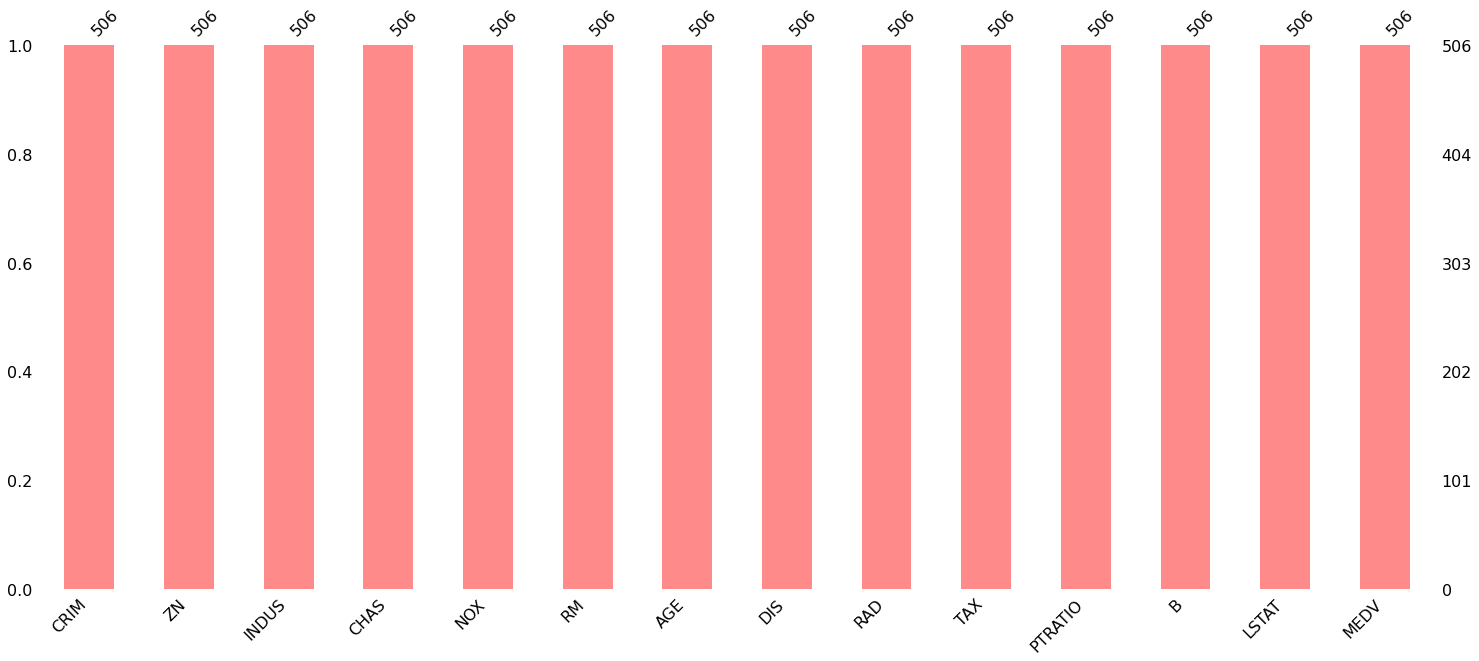

In [15]:
plt.figure(figsize=(10,7))
msno.bar(pdf, color = '#FF8A8A')
plt.show()

In [16]:
pdf[num_col].skew().sort_values().round(2)

B         -2.89
PTRATIO   -0.80
AGE       -0.60
INDUS      0.30
RM         0.40
TAX        0.67
NOX        0.73
LSTAT      0.91
DIS        1.01
MEDV       1.11
ZN         2.23
CRIM       5.22
dtype: float64

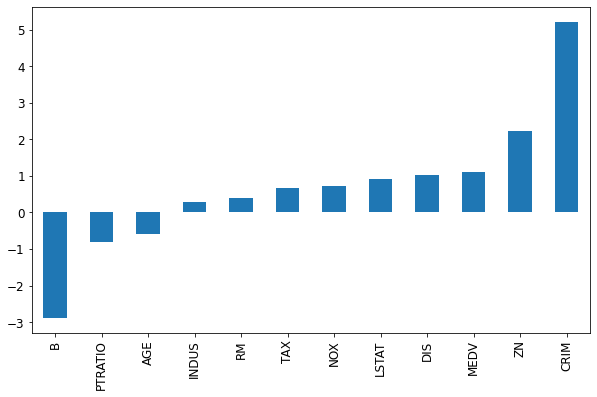

In [17]:
pdf[num_col].skew().sort_values().plot(kind='bar', figsize=(10,6))
plt.tick_params(labelsize=12)


### **Distribution for Numerical Column**

In [18]:
def num_chart(*var):
    for i in var:
        sns.set_style('darkgrid') # setting plot background
        plt.figure(figsize=(20,6)) # plot size
        plt.suptitle(f'Distribution and Outliers for {i}', fontsize = 20) # giving title
        plt.subplot(1,2,1)
        ax = sns.histplot(data=pdf, x=i, bins= 8, kde=True)
        #ax.bar_label(ax.containers[0])
        ax.set_xlabel(i, fontsize=14)
        ax.set_ylabel('Count', fontsize=14)
        ax.tick_params(labelsize=12)
        
        
        plt.subplot(1,2,2)
        ax = sns.boxplot(data=pdf, x=i, color = '#FF8A8A')
        ax.set_xlabel(i, fontsize=14)
        ax.set_ylabel('Count', fontsize=14)
        ax.tick_params(labelsize=12)
        plt.show()

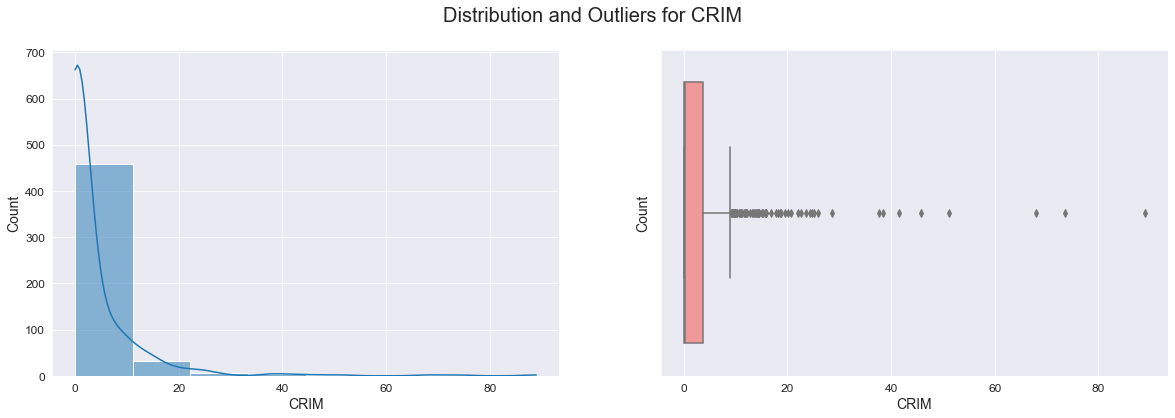

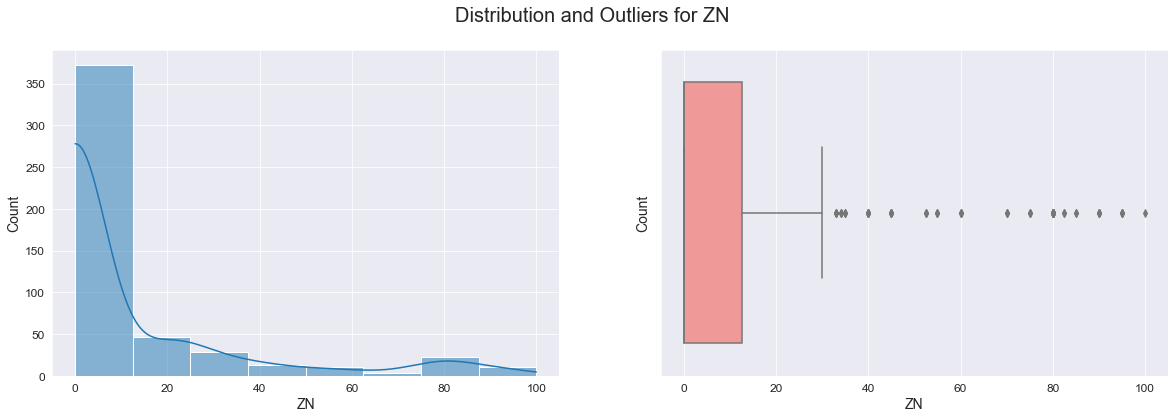

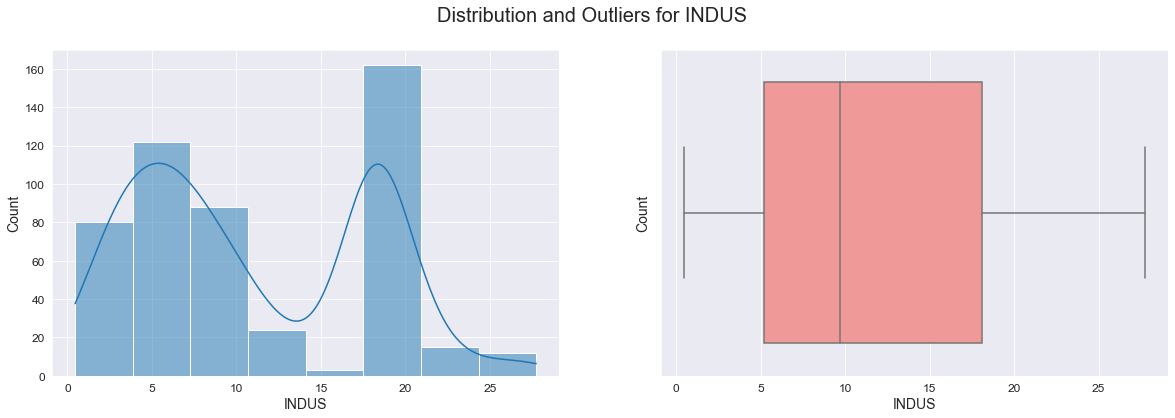

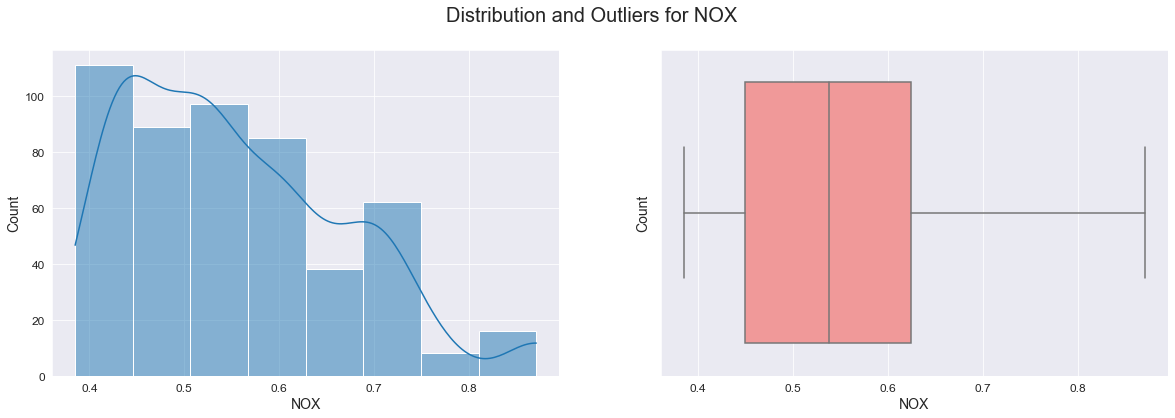

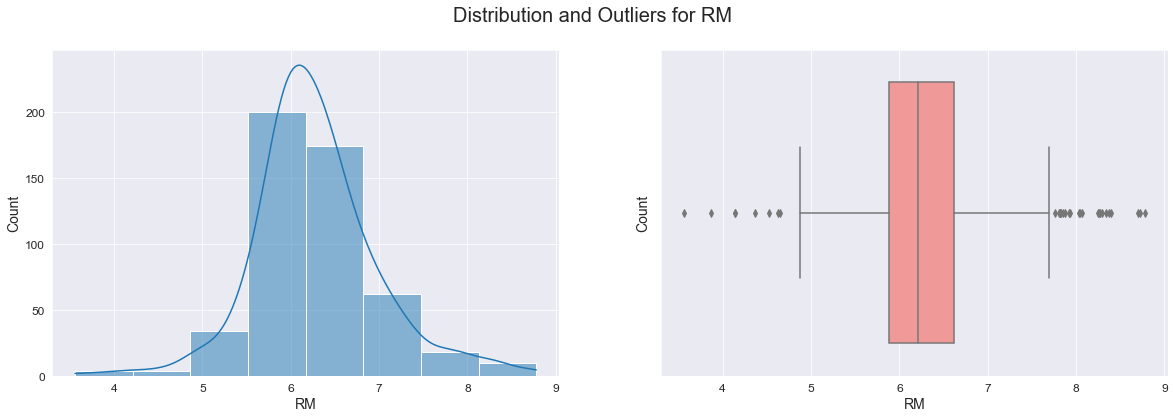

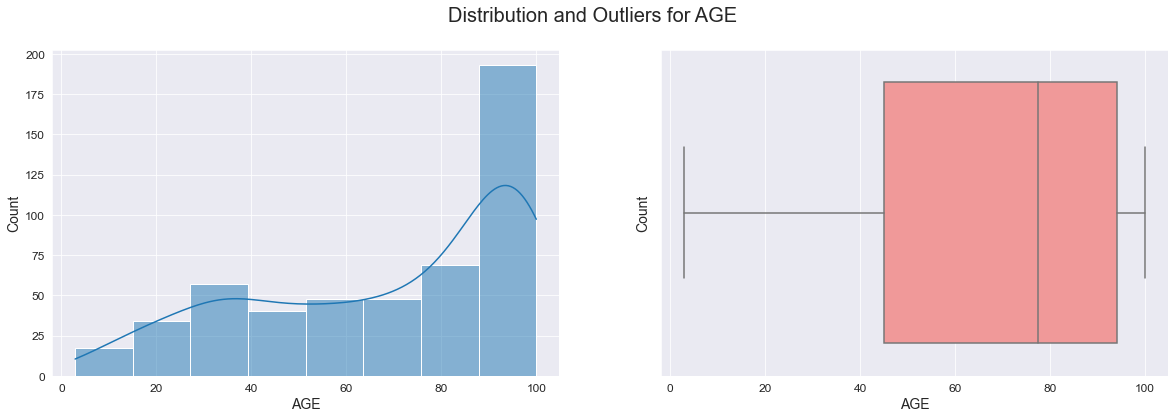

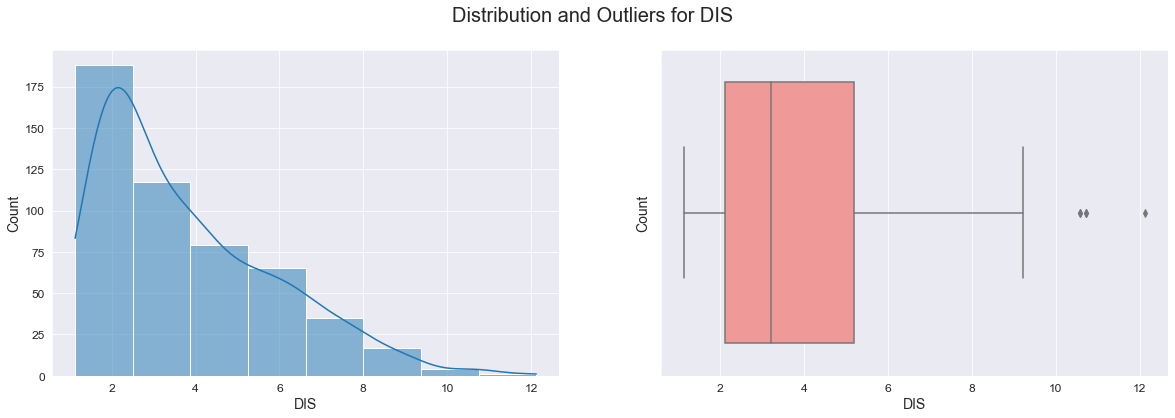

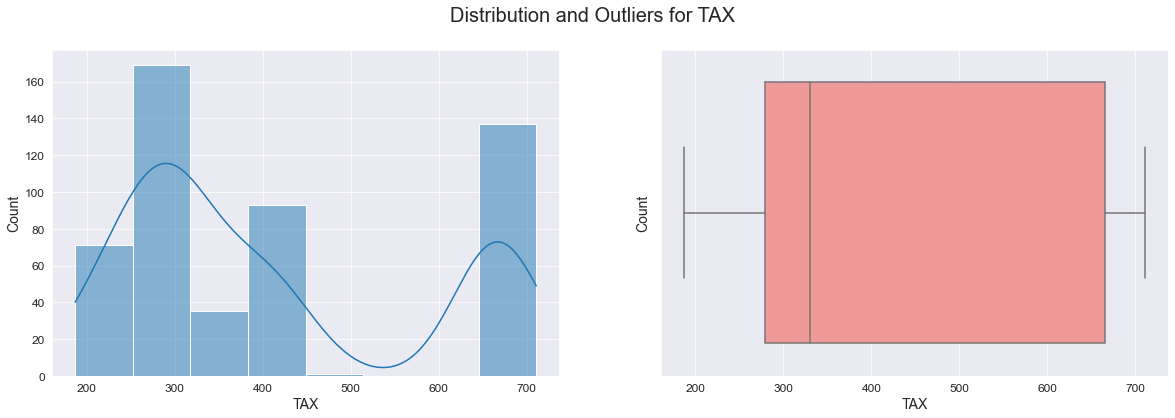

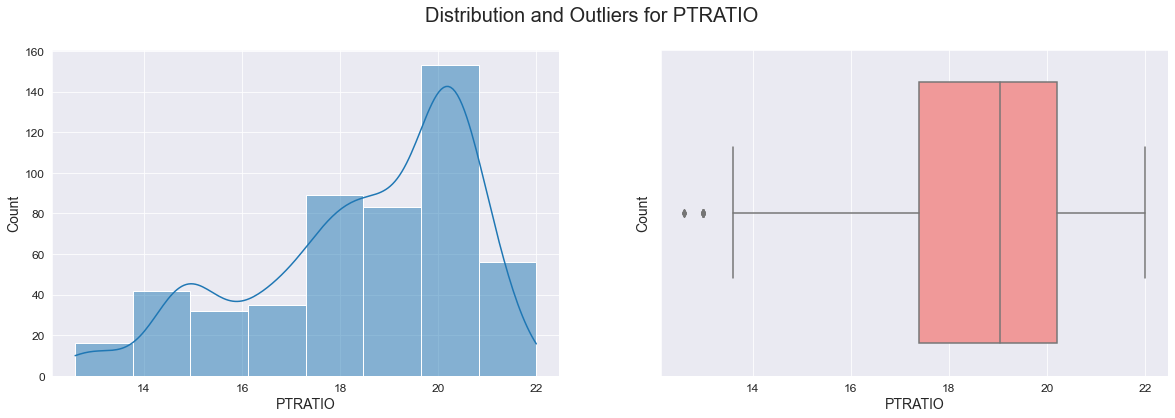

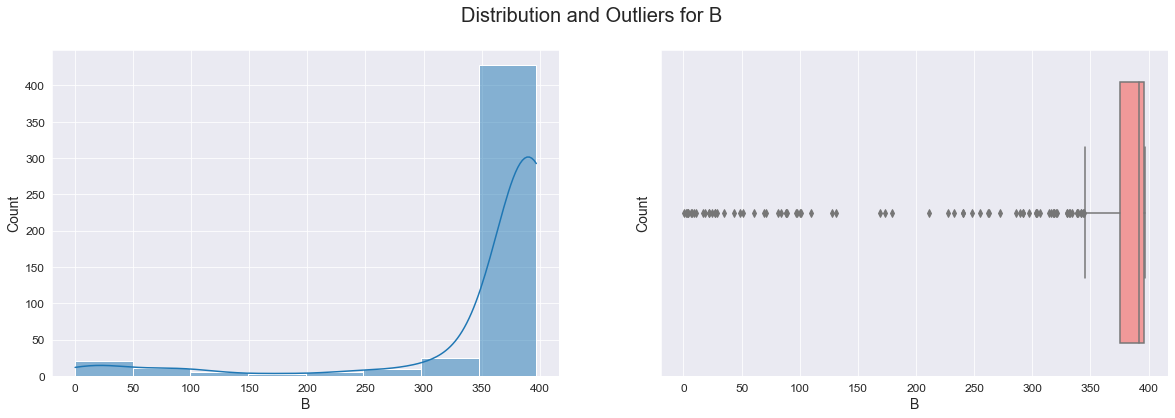

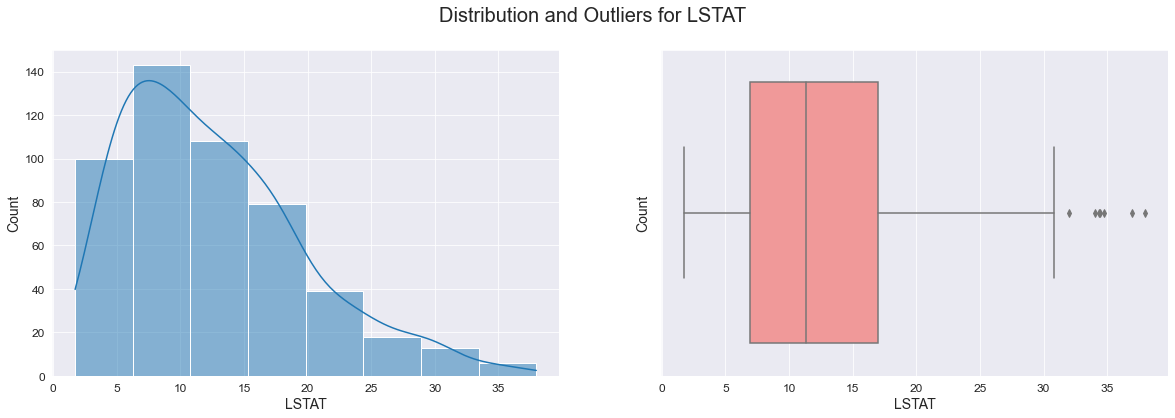

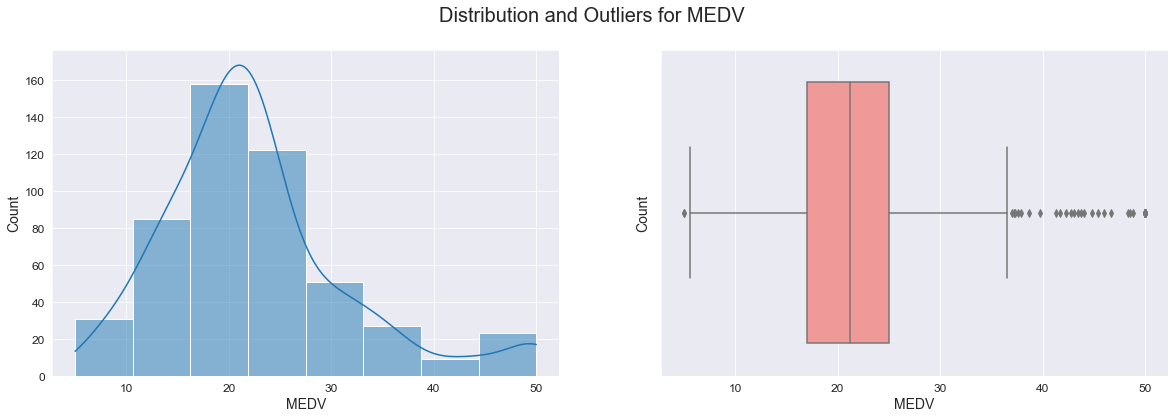

In [19]:
num_chart('CRIM','ZN','INDUS','NOX','RM','AGE','DIS','TAX','PTRATIO','B','LSTAT','MEDV')

### **Distribution for Categorical Column**

In [20]:
def cat_chart(*var):
    for i in var:
        sns.set_style('whitegrid') # setting plot background        
        plt.figure(figsize=(20,7)) # plot size
        plt.suptitle(f'Distribution of {i}', fontsize = 20) # giving title
        plt.subplot(1,2,1) # creating suplots
        ax = sns.countplot(x= pdf[i], palette='Set2') # creating countplot
        ax.bar_label(ax.containers[0]) # assignig bar values
        ax.set_xlabel(i, fontsize=14)
        ax.set_ylabel('Count', fontsize=14)
        ax.tick_params(labelsize=12)
        
        plt.subplot(1,2,2) # creating subplots
        ax = pdf[i].value_counts().plot(kind='pie', autopct = '%.2f', shadow = True) # creating pie plot 
        ax.set_ylabel(i, fontsize=14)
        ax.tick_params(labelsize=12)
        plt.show()

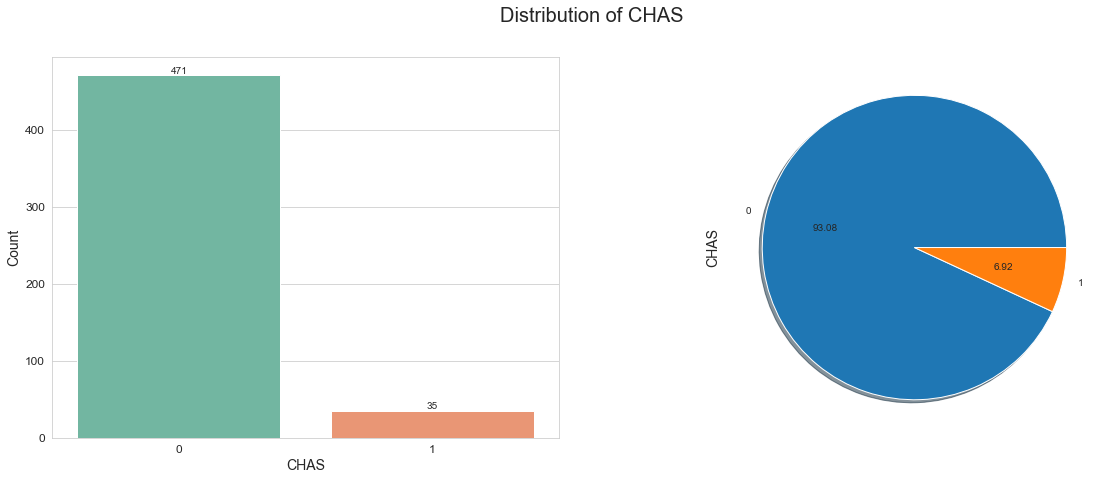

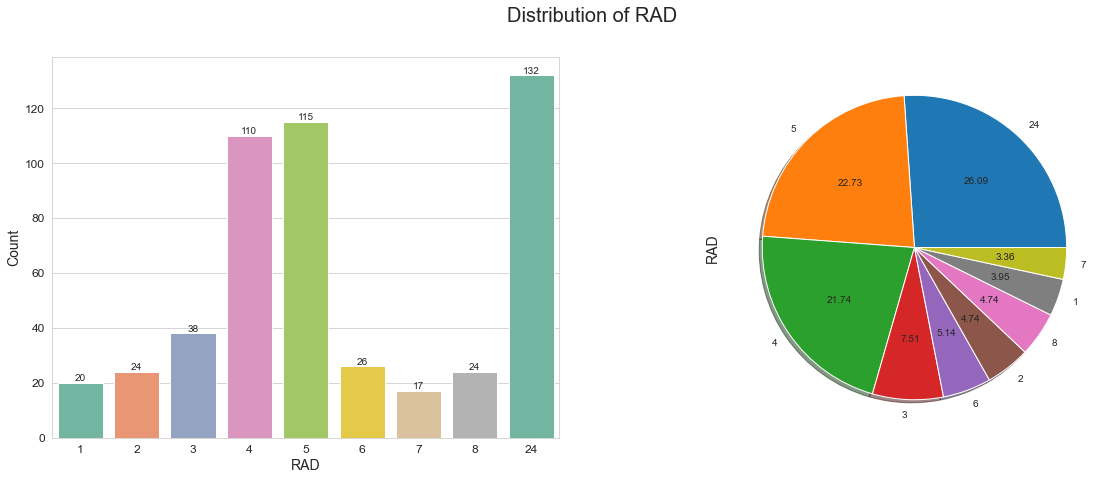

In [21]:
cat_chart('CHAS', 'RAD')

### **Relationship between Categorical and Numerical variables**

In [33]:
def cat_vs_num_chart(*var):
    for v in var:
        sns.set_style('darkgrid')
        c=1
        plt.subplots(figsize=(30, 25))
        for i in range(len(num_col)):
            plt.subplot(4,3,c)
            plt.gca()
            ax = sns.boxplot(x=pdf[v], y=pdf[num_col[i]], palette="Set2", linewidth=2.5,color='r',showmeans=True)
            ax.set_title(f'Relation between {v} and {num_col[i]}', fontsize=20)
            ax.tick_params(labelsize=12)
            ax.set_xlabel(v, fontsize=14)
            ax.set_ylabel(num_col[i], fontsize=14)
            plt.tight_layout()
            c+=1
        plt.suptitle(f'Relation of {v} with other variables', fontsize=30, y=1.03)

        plt.show()

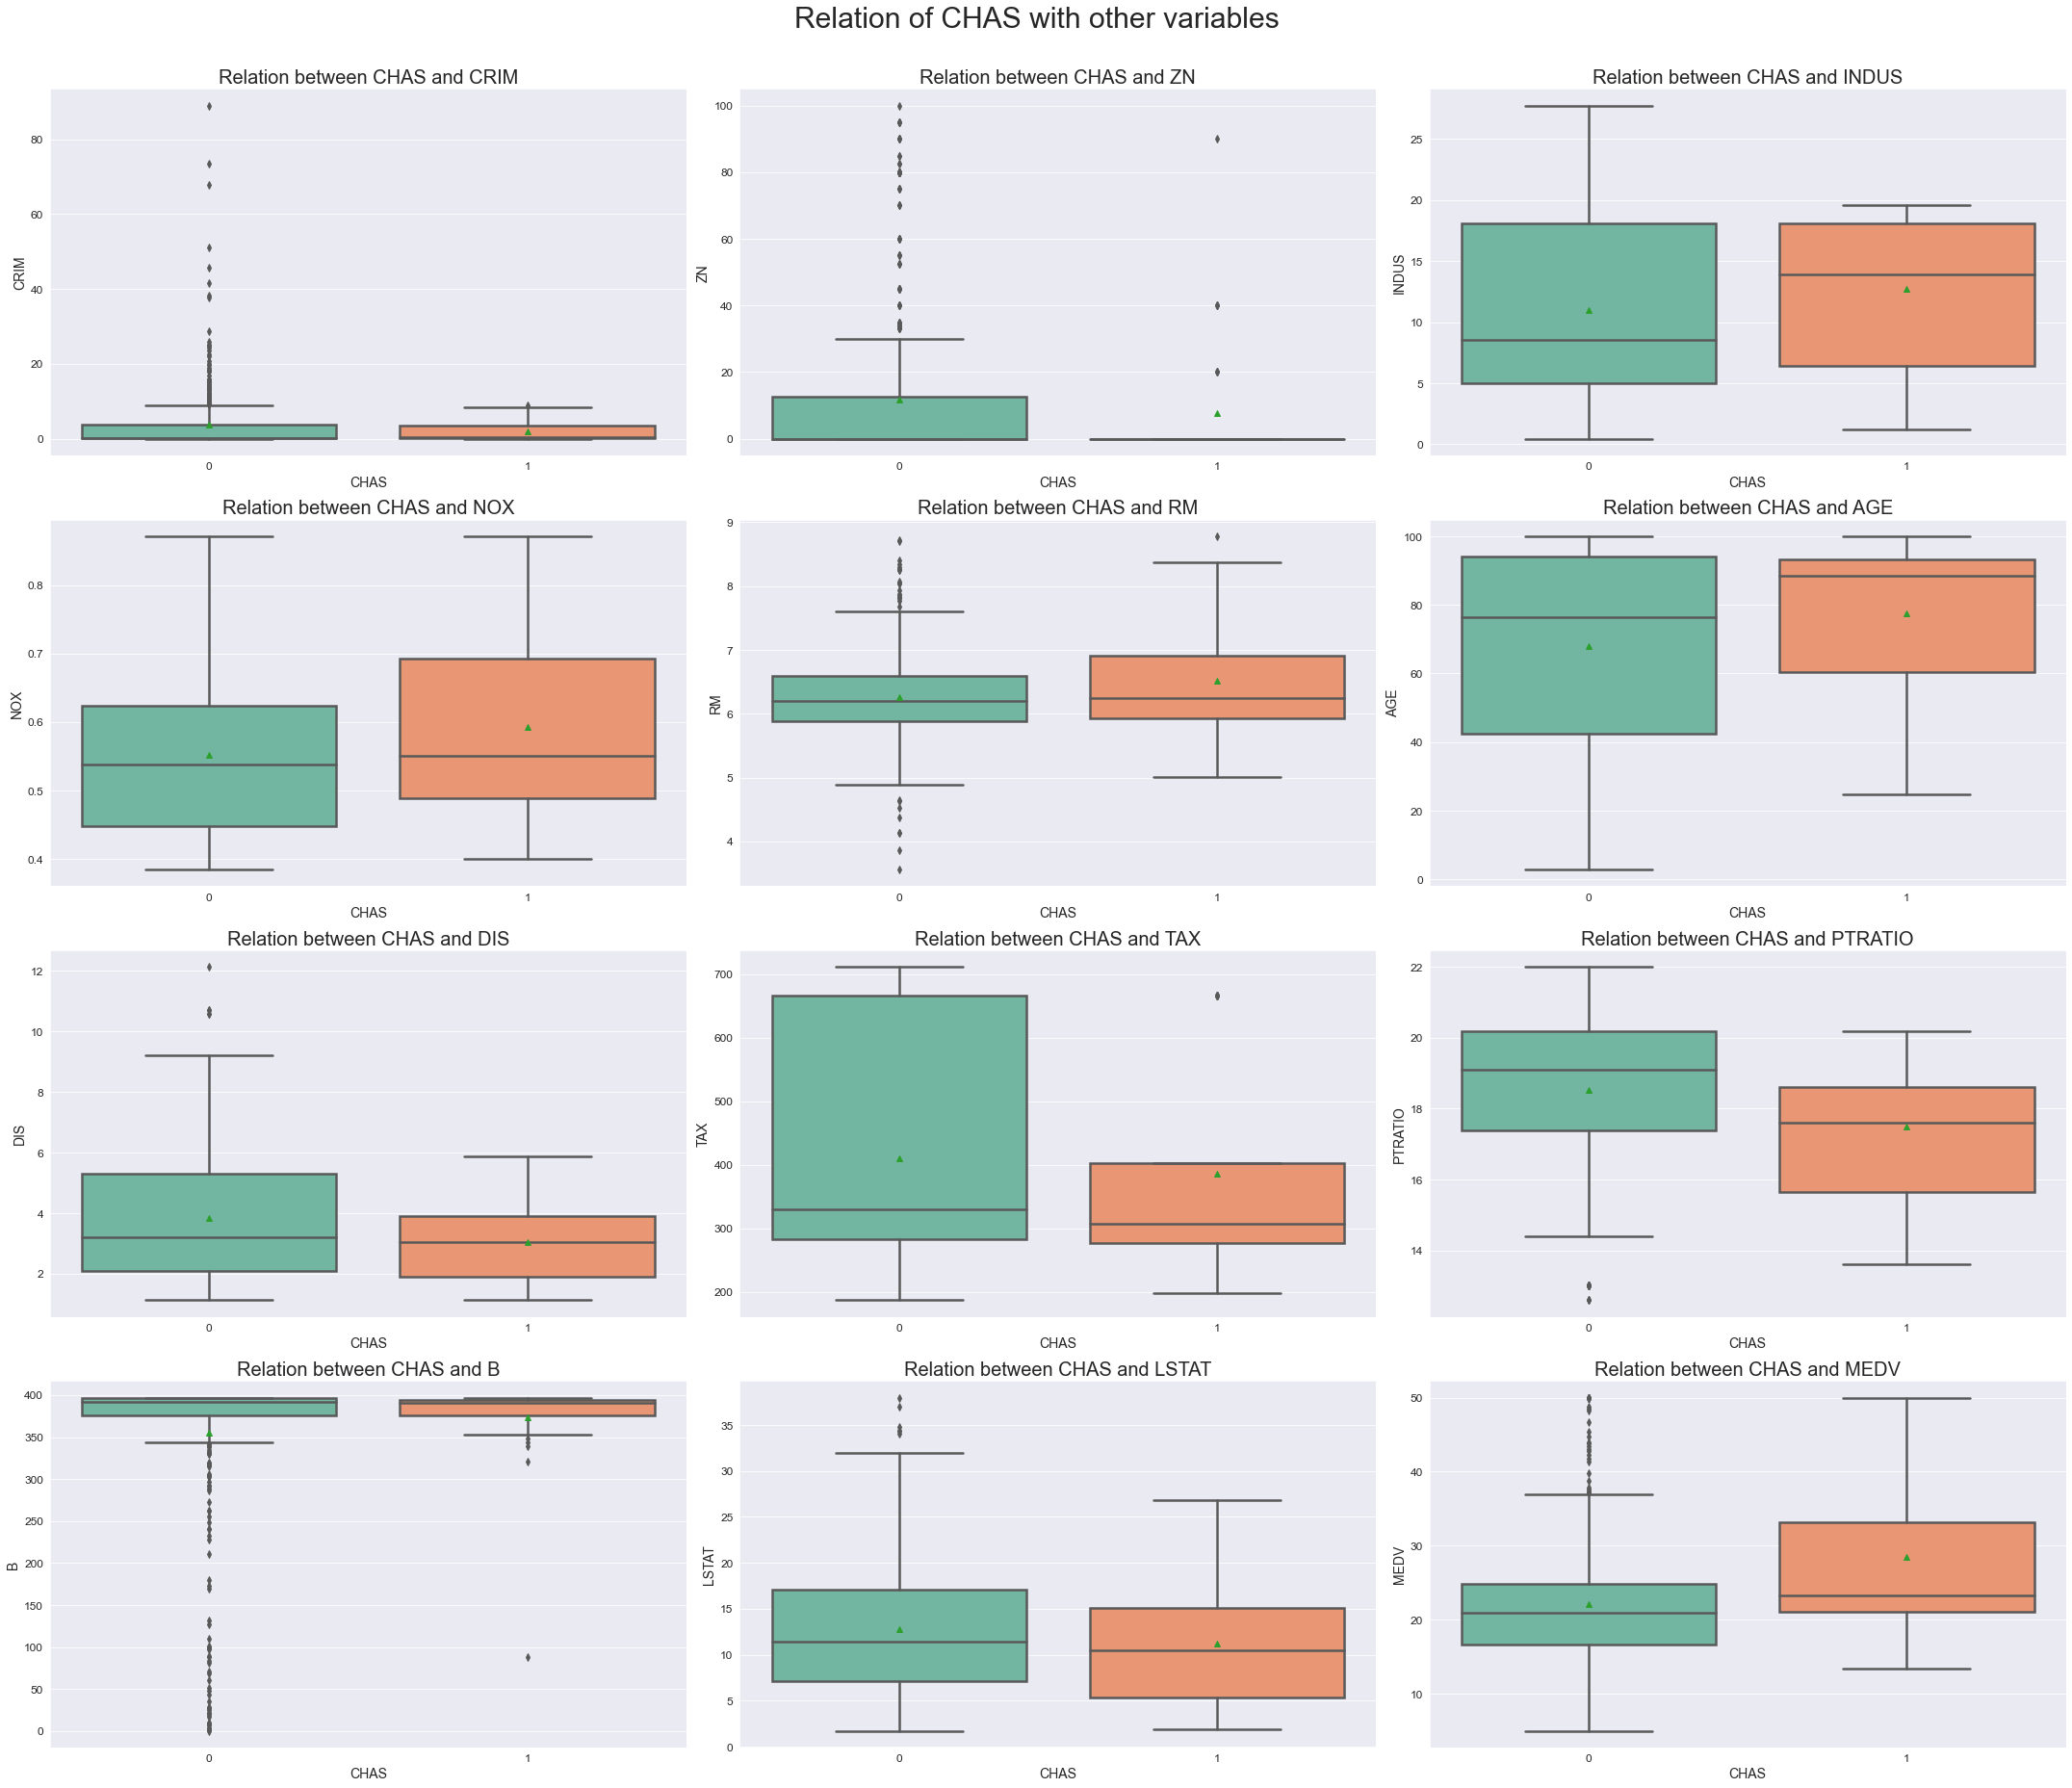

In [34]:
cat_vs_num_chart('CHAS')

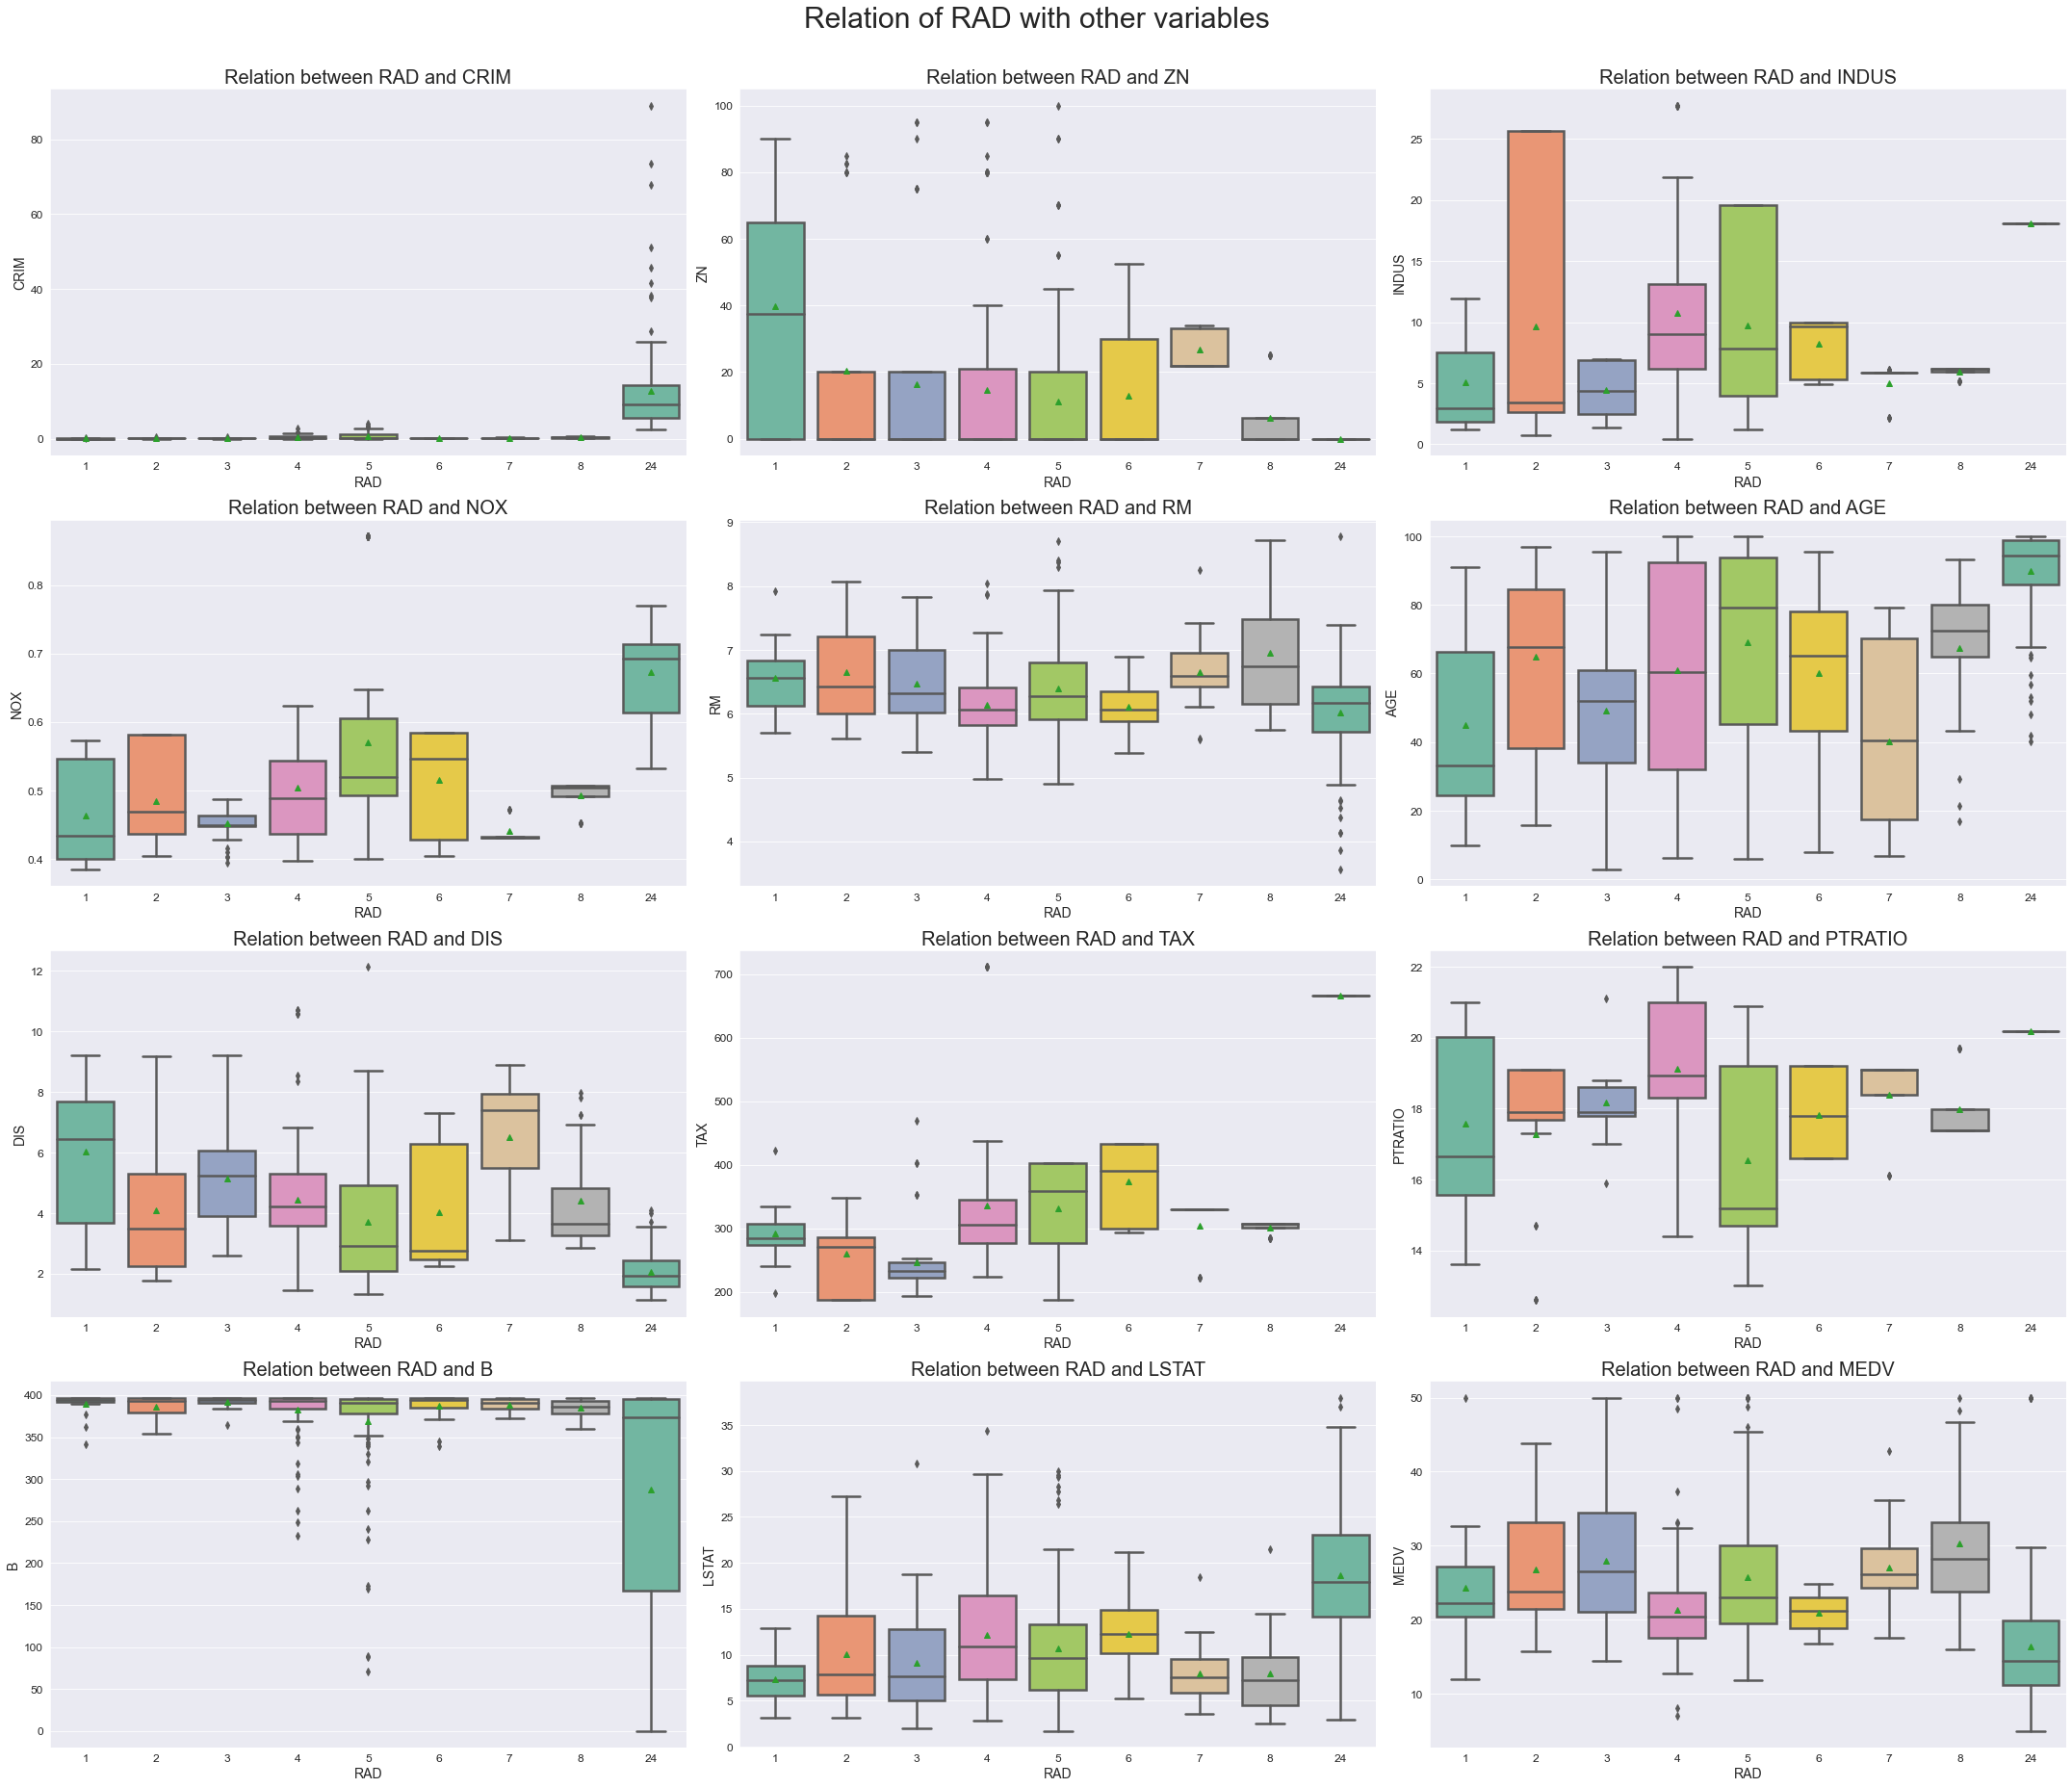

In [35]:
cat_vs_num_chart('RAD')